# HW4 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2020
#### Due : 7/01 (wednes)  11:59 PM [Through Black board]

## Assignment Credit

### Your assignments are 40% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 10%__
- __HW#3: 10%__
- __HW#4: 15%__

## Python Assingment HW4 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Problem1. Regression Model
## -Amzon stock price prediction.

### Problem 1-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [2]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv('./data/AMZN.csv')

In [3]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [4]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [5]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####
    for i in range(0, len(col_data)-lookback):
        x_datas.append([col_data[i:i+lookback]])

    y_datas = raw_data['Close'].values[lookback:]
    ##########################    
    x_data = np.concatenate(x_datas,0)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [6]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_datas

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_datas\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [7]:
def split_datas(x,y):
    ##### Your Code Here ####
    test_len = 60
    x_train = x[:-test_len]
    x_test = x[-test_len:]
    y_train = y[:-test_len]
    y_test = y[-test_len:]
    ###########################
    return x_train, x_test, y_train, y_test

In [8]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [9]:
x_train, x_test, y_train, y_test = split_datas(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5223, 5), (5223,), (60, 5), (60,))

### <br/>Problem 1-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [10]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_datas(x, y)

    ##### Your Code Here ####
    model = make_pipeline(PolynomialFeatures(poly_degree), linear_model.LinearRegression())
    model.fit(x_train, y_train)
    test_pred = model.predict(x_test)
    ########################
#     print ("MSE - Train %.4f"%mean_squared_error(model.predict(x_train), y_train))
#     print ("MSE - Test %.4f"%mean_squared_error(model.predict(x_test), y_test))
    
    return test_pred, y_test

In [12]:
# TODO : run experiment with various combination
column_name = raw_data.columns.values
best_model = []
best_val_error = 10000
for col in column_name[1:]:
    for lookback in range(1,11):
        for degree in range(1,4):
            test_pred, y_test = run_regression(raw_data, column_name=col, lookback_days=lookback, poly_degree=degree)
            mse = mean_squared_error(test_pred, y_test)
            if mse < best_val_error:
                best_val_error = mse
                best_model = [col, lookback, degree]

print(best_model)
print(best_val_error)

['Close', 3, 2]
790.4252890787659


Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable : High       <br/>
Lookback : 12      <br/>
Poly_degree : 4      <br/>

### Problem 1-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###
1.
overfitting : 실제 모델보다 복잡한 모델을 사용해서 training error는 줄어들게 되지만, training set의 의미없는 부분까지 학습하게 되어 새로운 데이터가 들어왔을 때, 그에 대한 예측의 정확성은 떨어지게 된다 (High variance)<br>
underfitting : 실제 모델보다 간단한 모델을 사용해서 실제 모델을 예측하는데 어려움이 있다. (High bias)<br>
<br>
2.
Train error 는 6이하로 나왔지만, Test error는 어마어마하게 큰 값이 나왔다. overfitting된 것 같다. 더 간단한 모델을 사용할 필요가 있을 것이다

### Problem 1-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [13]:
# TODO : Assign your best prediction for test data to best_pred
test_pred, y_test = run_regression(raw_data, column_name=best_model[0], lookback_days=best_model[1], poly_degree=best_model[2])
best_pred = test_pred

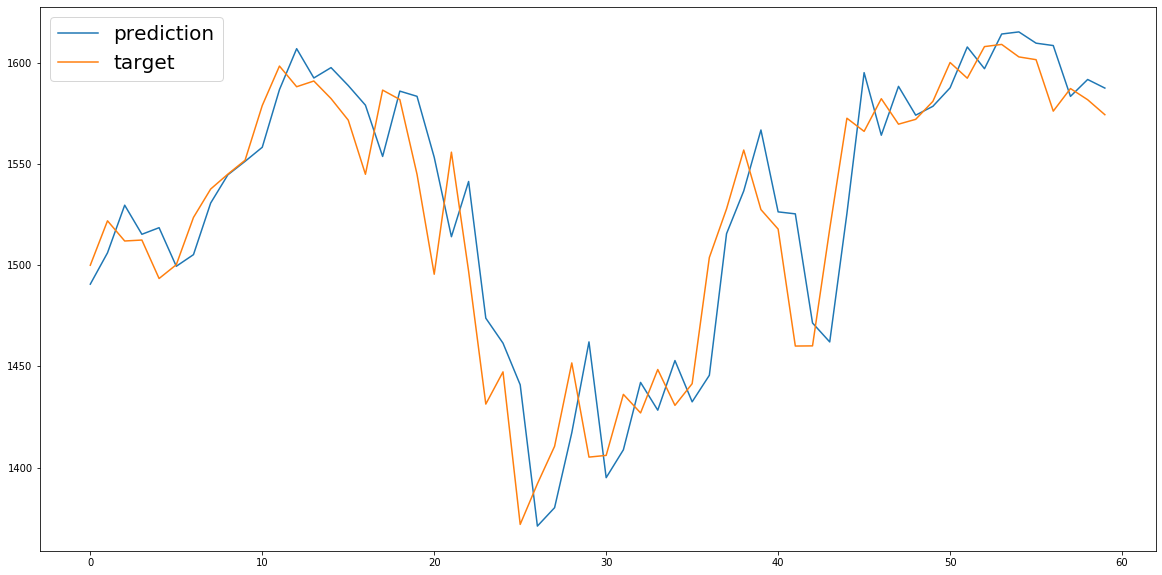

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem2. Regression Model
## -Covid Confirmed prediction.

In [15]:
#import covidall dataset 
train = pd.read_csv('data/train.csv')
all_data = pd.read_csv('data/covid_all.csv') #set your working directory
all_data

,Unnamed: 0,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,...,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,35677,13454,-1.0,83,183,2020-05-10,0.0,0.0,13455.0,109,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35678,35678,13455,-1.0,83,183,2020-05-11,0.0,0.0,13456.0,110,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35679,35679,13456,-1.0,83,183,2020-05-12,0.0,0.0,13457.0,111,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35680,35680,13457,-1.0,83,183,2020-05-13,0.0,0.0,13458.0,112,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0


In [16]:
country_dict = {'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burma': 27,
 'Burundi': 28,
 'Cabo Verde': 29,
 'Cambodia': 30,
 'Cameroon': 31,
 'Canada': 32,
 'Central African Republic': 33,
 'Chad': 34,
 'Chile': 35,
 'China': 36,
 'Colombia': 37,
 'Congo (Brazzaville)': 38,
 'Congo (Kinshasa)': 39,
 'Costa Rica': 40,
 "Cote d'Ivoire": 41,
 'Croatia': 42,
 'Cuba': 43,
 'Cyprus': 44,
 'Czechia': 45,
 'Denmark': 46,
 'Diamond Princess': 47,
 'Djibouti': 48,
 'Dominica': 49,
 'Dominican Republic': 50,
 'Ecuador': 51,
 'Egypt': 52,
 'El Salvador': 53,
 'Equatorial Guinea': 54,
 'Eritrea': 55,
 'Estonia': 56,
 'Eswatini': 57,
 'Ethiopia': 58,
 'Fiji': 59,
 'Finland': 60,
 'France': 61,
 'Gabon': 62,
 'Gambia': 63,
 'Georgia': 64,
 'Germany': 65,
 'Ghana': 66,
 'Greece': 67,
 'Grenada': 68,
 'Guatemala': 69,
 'Guinea': 70,
 'Guinea-Bissau': 71,
 'Guyana': 72,
 'Haiti': 73,
 'Holy See': 74,
 'Honduras': 75,
 'Hungary': 76,
 'Iceland': 77,
 'India': 78,
 'Indonesia': 79,
 'Iran': 80,
 'Iraq': 81,
 'Ireland': 82,
 'Israel': 83,
 'Italy': 84,
 'Jamaica': 85,
 'Japan': 86,
 'Jordan': 87,
 'Kazakhstan': 88,
 'Kenya': 89,
 'Korea, South': 90,
 'Kosovo': 91,
 'Kuwait': 92,
 'Kyrgyzstan': 93,
 'Laos': 94,
 'Latvia': 95,
 'Lebanon': 96,
 'Liberia': 97,
 'Libya': 98,
 'Liechtenstein': 99,
 'Lithuania': 100,
 'Luxembourg': 101,
 'MS Zaandam': 102,
 'Madagascar': 103,
 'Malawi': 104,
 'Malaysia': 105,
 'Maldives': 106,
 'Mali': 107,
 'Malta': 108,
 'Mauritania': 109,
 'Mauritius': 110,
 'Mexico': 111,
 'Moldova': 112,
 'Monaco': 113,
 'Mongolia': 114,
 'Montenegro': 115,
 'Morocco': 116,
 'Mozambique': 117,
 'Namibia': 118,
 'Nepal': 119,
 'Netherlands': 120,
 'New Zealand': 121,
 'Nicaragua': 122,
 'Niger': 123,
 'Nigeria': 124,
 'North Macedonia': 125,
 'Norway': 126,
 'Oman': 127,
 'Pakistan': 128,
 'Panama': 129,
 'Papua New Guinea': 130,
 'Paraguay': 131,
 'Peru': 132,
 'Philippines': 133,
 'Poland': 134,
 'Portugal': 135,
 'Qatar': 136,
 'Romania': 137,
 'Russia': 138,
 'Rwanda': 139,
 'Saint Kitts and Nevis': 140,
 'Saint Lucia': 141,
 'Saint Vincent and the Grenadines': 142,
 'San Marino': 143,
 'Sao Tome and Principe': 144,
 'Saudi Arabia': 145,
 'Senegal': 146,
 'Serbia': 147,
 'Seychelles': 148,
 'Sierra Leone': 149,
 'Singapore': 150,
 'Slovakia': 151,
 'Slovenia': 152,
 'Somalia': 153,
 'South Africa': 154,
 'South Sudan': 155,
 'Spain': 156,
 'Sri Lanka': 157,
 'Sudan': 158,
 'Suriname': 159,
 'Sweden': 160,
 'Switzerland': 161,
 'Syria': 162,
 'Taiwan*': 163,
 'Tanzania': 164,
 'Thailand': 165,
 'Timor-Leste': 166,
 'Togo': 167,
 'Trinidad and Tobago': 168,
 'Tunisia': 169,
 'Turkey': 170,
 'US': 171,
 'Uganda': 172,
 'Ukraine': 173,
 'United Arab Emirates': 174,
 'United Kingdom': 175,
 'Uruguay': 176,
 'Uzbekistan': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'West Bank and Gaza': 180,
 'Western Sahara': 181,
 'Zambia': 182,
 'Zimbabwe': 183}

### <br/>Problem 2-1 Plot ' Spain' covid-Confiremedcases graph between march 1 to march 11.
- your completed graph doesn't have to be the same as the example.

Text(0, 0.5, 'Log ConfirmedCases')

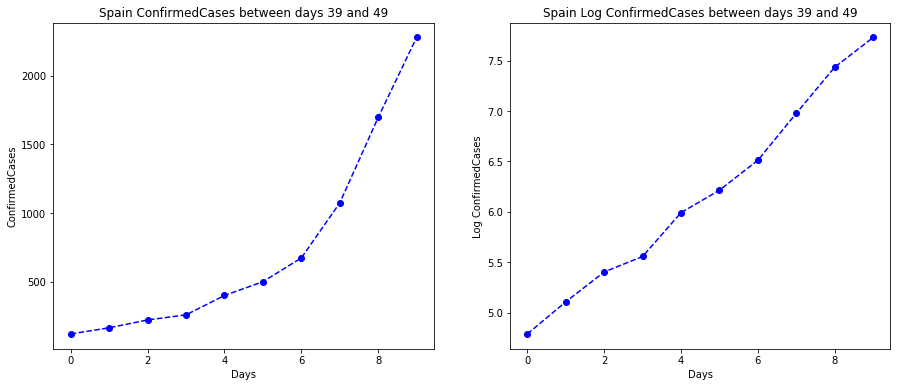

In [17]:
# plot 'Spain' covid-Confiremedcases graph between march 1 to march 11.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

###To do####  
y1 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']]
x1 = range(0, len(y1))
ax1.plot(x1, y1, 'bo--')
ax1.set_title("Spain ConfirmedCases between days 39 and 49")
ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")

## To do ###
##apply log transform to y variables ## 

y2 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']].apply(lambda x: np.log(x))
x2 = range(0, len(y2))
ax2.plot(x2, y2, 'bo--')
ax2.set_title("Spain Log ConfirmedCases between days 39 and 49")
ax2.set_xlabel("Days")
ax2.set_ylabel("Log ConfirmedCases")

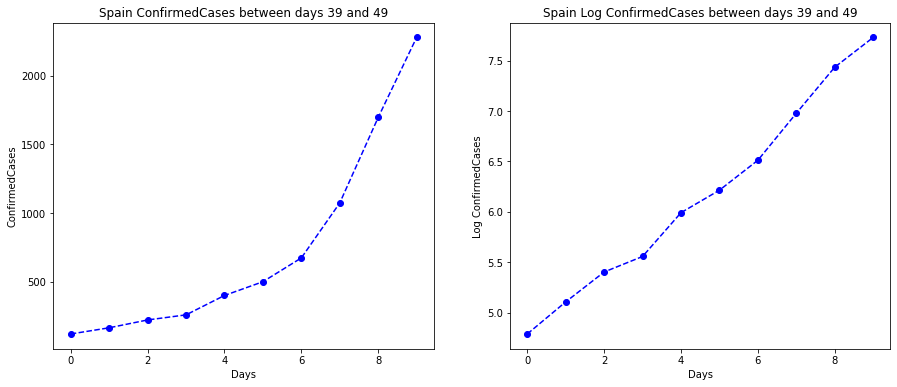

In [18]:
##don`t touch this cell##

# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)


### <br/>Problem 2-2  complete below function to  Split data into train/test and apply linear regression

In [19]:
#  Split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]
    
    ##To do ## for Train set 
    x_train = df[df.ForecastId == -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)
    y_train_1 = df[df.ForecastId == -1]['ConfirmedCases']
    y_train_2 = df[df.ForecastId == -1]['Fatalities']

    ##To do ## for  Test set
    x_test = df[df.ForecastId != -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)    

    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test #check to devide y_dataset 


# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    ##To do ##   Create linear regression object
    regr = linear_model.LinearRegression()

    ## To do ##  Train the model using the training sets
    regr.fit(X_train, Y_train)

    # To do ## Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    return regr, y_pred



In [20]:
##don`t touch this cell##
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14','2020-05-15']
def plot_linreg_basic_country(data, country_name, dates_list, day_start, shift, train_lim, test_lim):
    
    data_country = data[data['Country_Region']==country_dict[country_name]]
    data_country = data_country.loc[data_country['Day_num']>=day_start]
    X_train, Y_train_1, Y_train_2, X_test = split_data(data_country, train_lim, test_lim)
    model, pred = lin_reg(X_train, Y_train_1, X_test)

    # Create a df with both real cases and predictions (predictions starting on March 12th)
    X_train_check = X_train.copy()
    X_train_check['Target'] = Y_train_1

    X_test_check = X_test.copy()
    X_test_check['Target'] = pred

    X_final_check = pd.concat([X_train_check, X_test_check])

    # Select predictions from March 1st to March 25th
    predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
    real_data = train.loc[(train['Country_Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.expm1(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (from March " + str(1+shift) + " to March 25th)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log1p(real_data))
    ax2.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (from March " + str(1+shift) + " to March 30th)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Log-Lineal Regression for "+country_name))

### <br/>Problem 2-3  using above function'plot_linreg_basic_country' run the Linear Regression workflow to Korea, South case
 - your completed graph doesn't have to be the same as the example.


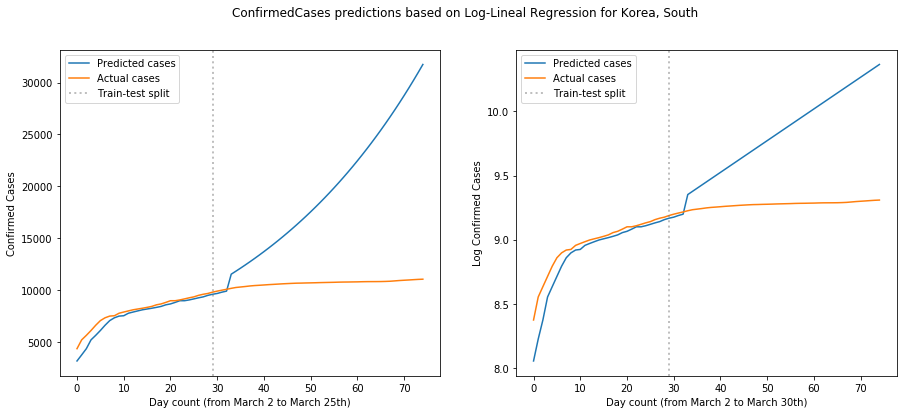

In [21]:
## To do ##  
country_name = "Korea, South"
march_day = 1
day_start = 37+march_day
dates_list2 = dates_list[march_day:]
train_lim, test_lim = 69, 112
plot_linreg_basic_country(data, country_name, dates_list2, day_start, march_day, train_lim, test_lim)

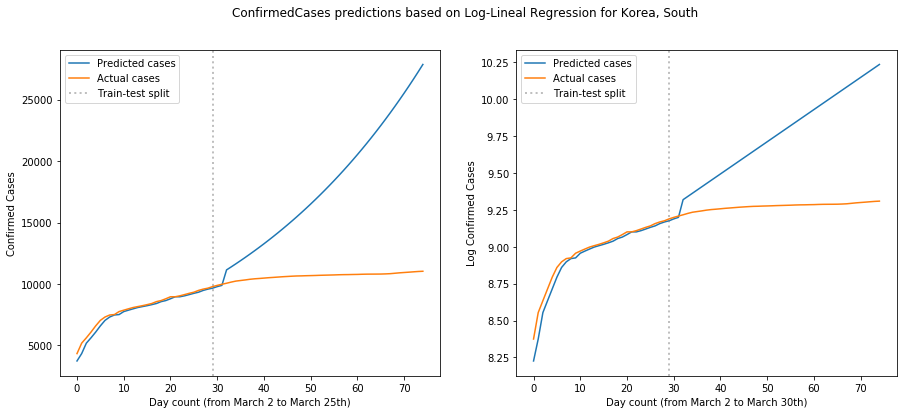

### <br/>Problem 2-4 Describe the significance and limitations of the graph above.

### YOUR ANSWER HERE ###

In [22]:
# train set은 잘 맞추지만 test set에 대한 예측은 잘 하지 못했다.
# linear regression 모델은 확진자 예측 모델으로 적합하지 않다.

## 3. Caculating Stringency Indexes of six countries 

Reference : https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Look at the document above and learn about Stringency Index (not legacy stringency index!!)

## 3-1 Data filtering

In [23]:
#load csv file you care ("OxCGRT_latest.csv")
###YOUR CODE HERE###
df = pd.read_csv('./data/OxCGRT_latest.csv')
df

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22177,Kosovo,RKS,20200509,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,1.0,0.0,0.0,NaN,862.0,28.0,94.71,94.71,93.57,93.57
22178,Kosovo,RKS,20200510,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,1.0,0.0,0.0,NaN,870.0,28.0,94.71,94.71,93.57,93.57
22179,Kosovo,RKS,20200511,3.0,1.0,2.0,1.0,2.0,1.0,4.0,...,1.0,0.0,0.0,NaN,884.0,28.0,94.71,94.71,93.57,93.57
22180,Kosovo,RKS,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,919.0,29.0,NaN,94.71,NaN,93.57


In [24]:
#Filter rows with six unique countries by 'CountryName'
#('CountryName' == Australia, China, Japan, New Zealand, Singapore, South Korea)
###YOUR CODE HERE###
df_filter = df[(df['CountryName'] == 'Australia') | (df['CountryName'] == 'China') | (df['CountryName'] == 'Japan') | (df['CountryName'] == 'New Zealand') | (df['CountryName'] == 'Singapore') | (df['CountryName'] == 'South Korea')]
df_filter

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
947,Australia,AUS,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
948,Australia,AUS,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
949,Australia,AUS,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
950,Australia,AUS,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
951,Australia,AUS,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,SGP,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22460.0,20.0,NaN,87.83,NaN,86.67
17721,Singapore,SGP,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23336.0,20.0,NaN,87.83,NaN,86.67
17722,Singapore,SGP,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23787.0,21.0,NaN,87.83,NaN,86.67
17723,Singapore,SGP,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24671.0,21.0,NaN,87.83,NaN,86.67


In [25]:
#Drop columns you don't need
#print dataframe you care about
###YOUR CODE HERE###
df_drop = df_filter.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 23, 24]]
#use columns : 
"""
['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']
"""
df_drop

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag
947,Australia,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
948,Australia,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
949,Australia,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
950,Australia,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
951,Australia,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17721,Singapore,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17722,Singapore,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17723,Singapore,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3-2 Calculating Stringency Index

you can use some pakages to deal with 'nan' values

In [26]:
#stringency calculation
#step1 : calculate weight for a policy of general scope
###YOUR CODE HERE###
# C1, C2, C3, C4, C5, C6, C7, H1, C8
N = [3,3,2,4,2,3,2,2,4]
G = [1,1,1,1,1,1,1,1,0]

w = 0
for n in range(len(N)):
    if G[n]:
        w += (1.0/(N[n]+1))
w /= 8
w

0.28541666666666665

In [27]:
#step2 : calculate sub-indices
#calculate C1-C9, G1-G8, and I1-I9 
###YOUR CODE HERE###
C = [df_drop['C1_School closing'], df_drop['C2_Workplace closing'], df_drop['C3_Cancel public events'], \
     df_drop['C4_Restrictions on gatherings'], df_drop['C5_Close public transport'], df_drop['C6_Stay at home requirements'], \
     df_drop['C7_Restrictions on internal movement'], df_drop['H1_Public information campaigns'], \
     df_drop['C8_International travel controls']]
C = [c.fillna(method='ffill') for c in C]
G = [1]*8
I = [100*((1-w)*(C[j]/N[j]) + w*G[j]) for j in range(8)]
I.append(100*(C[8]/N[8]))
I

[947       28.541667
 948       28.541667
 949       28.541667
 950       28.541667
 951       28.541667
             ...    
 17720    100.000000
 17721    100.000000
 17722    100.000000
 17723    100.000000
 17724    100.000000
 Name: C1_School closing, Length: 813, dtype: float64,
 947       28.541667
 948       28.541667
 949       28.541667
 950       28.541667
 951       28.541667
             ...    
 17720    100.000000
 17721    100.000000
 17722    100.000000
 17723    100.000000
 17724    100.000000
 Name: C2_Workplace closing, Length: 813, dtype: float64,
 947       28.541667
 948       28.541667
 949       28.541667
 950       28.541667
 951       28.541667
             ...    
 17720    100.000000
 17721    100.000000
 17722    100.000000
 17723    100.000000
 17724    100.000000
 Name: C3_Cancel public events, Length: 813, dtype: float64,
 947       28.541667
 948       28.541667
 949       28.541667
 950       28.541667
 951       28.541667
             ...    
 17720 

In [28]:
#step3 : calculate stringency index I (up to 2 decimal points)
###YOUR CODE HERE###
SI = round(sum(I)/9, 2)

In [29]:
#step4 : make your stingency index array into dataframe(column name = 'my_StringencyIndex') and concat it(axis = 1) to the result of 1-1 
###YOUR CODE HERE###
df_drop['my_StringencyIndex'] = SI
df_drop

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag,my_StringencyIndex
947,Australia,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,25.37
948,Australia,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,25.37
949,Australia,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,25.37
950,Australia,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,25.37
951,Australia,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,25.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.83
17721,Singapore,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.83
17722,Singapore,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.83
17723,Singapore,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.83


## Problem4. Topic Modeling (Clustering analysis of documents) for tweets related to COVID-19
A **topic model** is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.
 Please refer to [wikipedia](https://en.wikipedia.org/wiki/Topic_model#:~:text=In%20machine%20learning%20and%20natural,structures%20in%20a%20text%20body.) for detailed information.
- These documents were crawled from *twitter* with some *COVID-19* related keywords . All tweets are in English but have a lot of noisy information.
- In this problem, your goal is to cluster tweets according to the latent 'topics' with the statistical method, automatically. 


### Load the csv file using pandas library

In [30]:
df = pd.read_csv('./data/covid_twitter.csv') #set your working directory
text_en = df['text']
print(df.shape)
print(df.head())

(36121, 2)
   Unnamed: 0                                               text
0           6  .@PatriceHarrisMD spoke with @YahooFinance abo...
1          14  #CoronaUpdate | Johns Hopkins University has s...
2          17  Singapore donates 40,000 test kits to the Phil...
3          28  Lockdowns, drones: Will things ever go back to...
4          30  Does the #COVID19 pandemic have you feeling ou...


### Problem 4-1 Text Preprocessing
First of all, you should process the documents so that the model will not be perturbed by the noisy information

**a. Remove the following characters with *'re'* module in each tweets**
- special characters ( # @ , . | ? ! )
- *COVID* relavant words (COVID19, coronavirus, coronaoutbreak)

In [31]:
### YOUR CODE HERE ###
for n in range(len(text_en)):
    text = str(text_en[n])
    text = text.lower()
    text = re.sub('[#@,.|?!]', '', text)
    words = text.split()
    words = [w for w in words if w not in ['covid19', 'coronavirus', 'coronaoutbreak']]
    text = ''
    for w in words:
        text += ' ' + w
    text_en[n] = text
text_en

0         patriceharrismd spoke with yahoofinance about...
1         coronaupdate johns hopkins university has sai...
2         singapore donates 40000 test kits to the phil...
3         lockdowns drones: will things ever go back to...
4         does the pandemic have you feeling out-of-con...
                               ...                        
36116     top public health officer says coming week a ...
36117     went for a run this evening god reminded me t...
36118     trump ~ millions of face masks being made tho...
36119     for many students in our state closures are i...
36120     will the pandemic of 2020 come to be seen as ...
Name: text, Length: 36121, dtype: object

**b. Remove the *stop words* in each tweets**

*Stop words* are words which should be filtered out before given to the model. Please refer to [wikipedia](https://en.wikipedia.org/wiki/Stop_words#:~:text=In%20SEO%20terminology%2C%20stop%20words,save%20space%20in%20their%20databases.) for detailed information 
- First, you should download the stop word set from *nltk* module.

In [32]:
### NLP toolkit ###
import nltk
from nltk.corpus import stopwords

In [33]:
### Download the set with this
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dyddn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
### check the set with this
stop_words = set(stopwords.words('english'))
print(stop_words)

{'these', 'only', 'over', 'theirs', "shouldn't", 'your', 've', 'aren', 'his', "didn't", "it's", 'ourselves', 'doing', 'other', 'had', 'because', 'we', 'before', 'out', 'he', 'between', 'both', 'so', 'yours', 'y', 'itself', 'above', 'here', "needn't", "don't", 'i', 'too', 'are', 'what', 'by', 'most', 'doesn', 'or', 'each', 'very', 'mustn', 'why', 'she', 'below', 'in', "you'd", 'you', "you're", 'this', 'weren', 'being', 'up', "aren't", 'its', 'himself', 'the', 'off', 'then', 'into', 'under', 'an', 'hadn', 'there', 'from', 'haven', 'until', 'for', 'be', 'd', 'few', 'will', 'who', 'during', 'should', 'me', 'those', 'how', 'yourselves', 'not', 'needn', 'no', "should've", "you'll", 'my', 'do', 'our', 'of', 'any', 'nor', 'after', "mightn't", 't', "won't", 'they', 'more', 'been', 're', 'didn', 'same', 'while', 'does', 'did', 'just', "isn't", 'him', 'through', 'ain', 'own', 'wasn', "that'll", 'when', 'such', 'is', 'o', 'with', 'has', 'down', 'her', 'it', 'if', 'herself', 'can', "haven't", 'was'

**a. Update your set with some stop words which are not needed for modeling, you think.**

In [35]:
### YOUR CODE HERE ###
stop_words.update(['covid', 'covid_19', 'pandemic', 'virus', 'covid2019', 'corona'])

**b. Remove stop words from the tweet dataset with your own stop words set**

In [36]:
### YOUR CODE HERE ###
for n in range(len(text_en)):
    text = str(text_en[n])
    words = text.split()
    words = [w for w in words if w not in stop_words]
    text = ''
    for w in words:
        text += ' ' + w
    text_en[n] = text
text_en

0         patriceharrismd spoke yahoofinance stimulus p...
1         coronaupdate johns hopkins university said au...
2            singapore donates 40000 test kits philippines
3             lockdowns drones: things ever go back normal
4         feeling out-of-control overwhelmed take contr...
                               ...                        
36116     top public health officer says coming week cr...
36117     went run evening god reminded matter happens ...
36118     trump ~ millions face masks made thousands ve...
36119     many students state closures impacting abilit...
36120     2020 come seen momentary interruption compel ...
Name: text, Length: 36121, dtype: object

### Problem 4-2 Convert the documents to a tf-idf matrix 
*TF-IDF* is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Please refer to [this](http://mlwiki.org/index.php/TF-IDF)
- Please use the results of 4-1
- First, transform your tweets dataset into tf-idf matrix using the module below
- Print your tf-idf matrix after converting it into *pandas.DataFrame* format
- Set your own hyperparams.

In [37]:
### scikit learn ###
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
### YOUR CODE HERE ###
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_en)
tfidfmat = pd.DataFrame.sparse.from_spmatrix(X)
tfidfmat

,0,1,2,3,4,5,6,7,8,9,...,66352,66353,66354,66355,66356,66357,66358,66359,66360,66361
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Problem 4-3 Cluster the tf-idf matrix of tweets using the *K-Means* algorithm.
- Set your own hyperparams

In [39]:
### scikit learn ###
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

**a. Find an optimal value for the number of clusters using the *elbow method***
- Draw the plot for SSD(Sum of the Squared Distance) of *K-Means* algorithm by the number of clusters, K, as shown in the example


Example
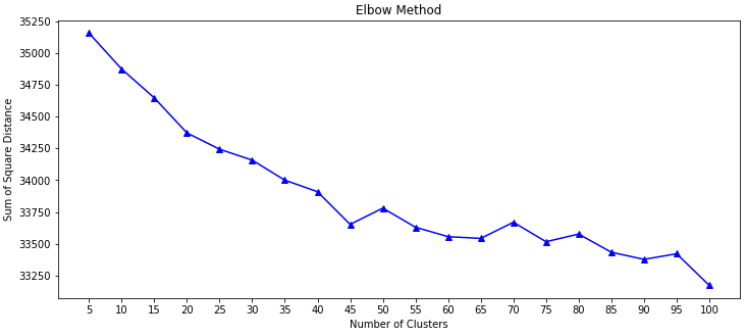

[35648.47104803667, 35471.05072566719, 35320.77934809968, 35266.88455368045, 35270.85167691224, 35173.12387726334, 35163.777939590465, 35084.80864288303, 35116.77052810417, 35106.289546911816, 35133.128201345244, 34990.37274087659, 34907.25713873381, 35098.8299942834, 35006.24302016798, 35202.50309186075, 35021.925757711724, 35039.40747078861, 35106.87723277155]


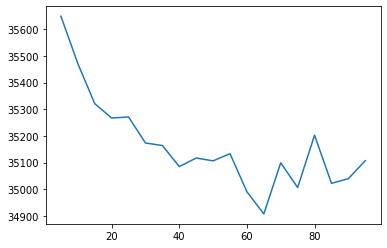

In [40]:
### YOUR CODE HERE ###
ssd = []
for k in range(5, 100, 5):
     ssd.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=42).fit(X).inertia_)
print(ssd)
plt.plot(range(5, 100, 5), ssd)

**b. Based on the your plot above, pick a proper value for K and justify why.**
It is OK that you can't find any proper value for K. If not, specify why these are not proper.

**### YOUR DESCRIPTION HERE ###**
 <br>
k=65
<br>
k가 65일 때 SSD가 최소라서 65를 선택했습니다.
<br>

### Problem 4-4 Visualize your clusters to evaluate the results of clustering analysis.

**a. Assgin the cluster index for each tweet with K=14**
- In other words, predict the label for each example

In [41]:
### YOUR CODE HERE ###
k = 65
cluster = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=42).fit_predict(X)

**b. Fill the function in below, which visualizes your clusters with PCA and TSNE**

Both *PCA* and *TSNE* are the most common visualization techniques in the machine learning community. It is usually known that TSNE could capture the non-linear relationship between datapoints than PCA. For more detailed information, please refer to [this](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
- At first, this function randomly selects some samples for fitting PCA, depending on your device's capability.
- Get the PCA matrices from the results of 4-2(tf-idf matrix) where the number of principal components is 2, each.
- If you are uncomfortable with this function, you can make your own function to accomplish the same goal with this.

Example
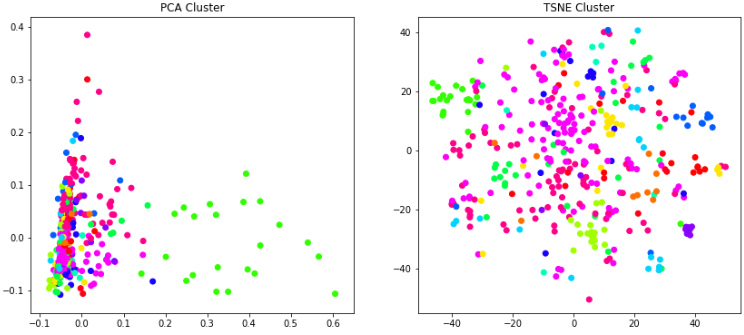

In [42]:
### visualization methods ###
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
### for plotting ###
import matplotlib.cm as cm

In [43]:
def plot_tsne_pca(data, labels):
    '''
    This function plots the PCA and t-SNE on 2D plane.
    args:
        data: tf-idf weight matrix
        labels: predictions from K-means
    '''
    # initial set up and random pick up samples
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    ######################## YOUR CODE HERE ########################
    '''
    pca (2000 x 2) : extract 2 eigenvectors that have the most explained variance
    tsne (2000 x 2) : feed the 50 principal components to t-SNE
                     For TSNE, you can use the TSNE().fit_transform() function.
    '''
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    #################################################################
    
    # random pick certain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    # plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')

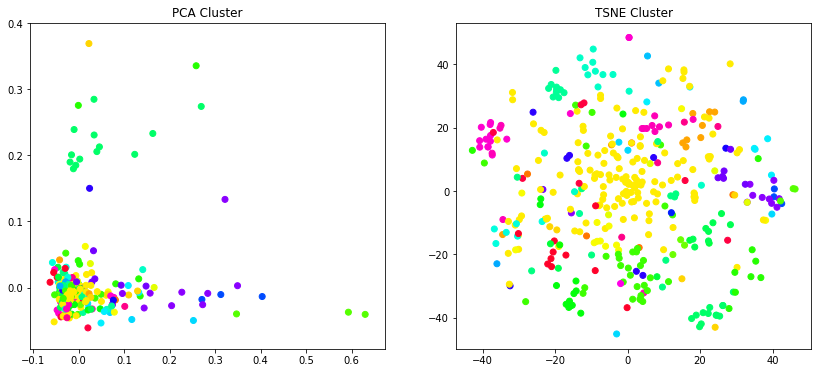

In [44]:
### YOUR CODE HERE ###
# plot PCA and t-SNE reduced data with above function
plot_tsne_pca(X, cluster)

### Problem 4-5 Extract keywords from each clusters

**a. get the top keywords from each cluster you've got from 4-4 (a.), based on the tf-idf matrix values**

- Use the function in below or make your own function to achieve the same goal with this function.

Example
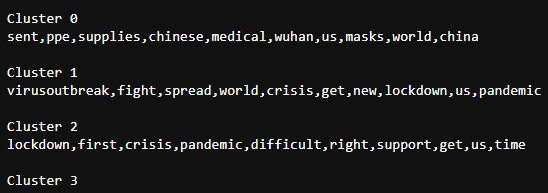

In [45]:
def get_top_keywords(data, clusters, labels, n_terms=10):
    '''
    This function displays the top keywords based on tf-idf score.
    data = tf-idf array
    clusters = assigned cluster index
    labels = vectorizer.get_feature_names()
    n_terms = top n keywords
    '''
    #  based on predictions
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # loop through each clusters and print top 10 score words
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [46]:
### YOUR CODE HERE ###
get_top_keywords(X, cluster, vectorizer.get_feature_names(), 10)


Cluster 0
internet,shutdown,risking,host,lift,bangladesh,helpless,rohingya,obstructing,refugees

Cluster 1
digital,solutions,innovation,recover,livelihoods,sdgs,gains,undp,deploying,humandevelopment

Cluster 2
physical,create,technology,maintain,solution,except,home,trips,connections,doingmypartco

Cluster 3
fast,st,fuck,needing,psa,louis,it,stlouis,beginning,filling

Cluster 4
disease,according,negative,district,five,kerala,cured,collector,tested,pathanamthitta

Cluster 5
2020,people,joediffie,complications,march,61,across,joe,diffie,country

Cluster 6
𝟳𝟬,trump,coronavirusoutbreak,take,would,order,understand,doesn,maggienyt,impotus45

Cluster 7
sundaymotivation,coronaviruspandemic,coronainpakistan,quarantine,socialdistancing,coronavirusoutbreak,whencoronavirusisover,coronalockdown,stayathomeandstaysafe,coronaupdate

Cluster 8
covid19aus,planning,australian,welfare,ages,wages,employers,transfer,examining,as

Cluster 9
iran,breaking,new,rises,deaths,first,italy,cases,toll,death

Cluste

**b. According to the keywords selected from (a.), describe the differences between clusters or guess the topic of tweets in the specific cluster**

**### YOUR DESCRIPTION HERE ###**
<br>
Cluster 9 : 이란과 이탈리아에서 사망자가 많이 발생했다
<br>
Cluster 24 : 아이들을 보호하기 위해 가족과 학교의 도움이 필요하다
<br>
Cluster 27 : 약이 필요하다. 다같이 힘내자.
<br>
Cluster 38 : 사회적 거리두기.
<br>
Cluster 55 : 종교인들. 기도하자
<br>

### End of HW4 ###
Thanks for all your works